## Statistical parameter estimations for real data 

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams["axes.unicode_minus"] = False
import datetime
import seaborn as sns

sunspots = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")

display(sunspots.head())

display(sunspots.shape)

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


(2820, 2)

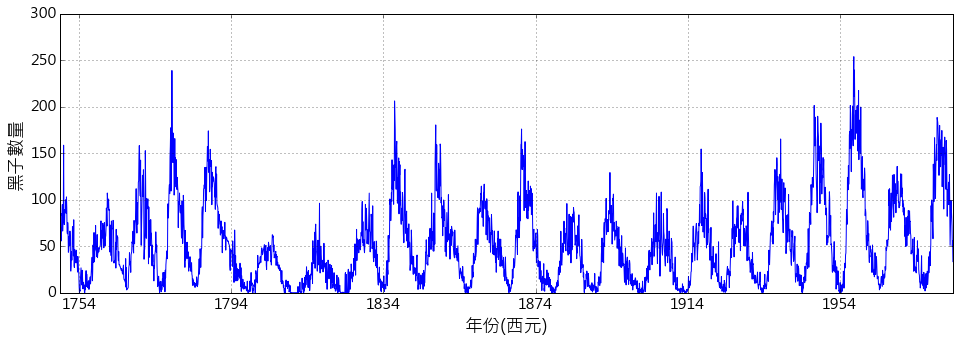

In [2]:
month = np.array(sunspots["Month"])
date_time = pd.to_datetime(month)

num = np.array(sunspots["Sunspots"]+0.1)

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(date_time, num, lw = 1, color = "blue")
ax.set_xlabel("年份(西元)", fontsize = 18)
ax.set_ylabel("黑子數量", fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 15)
plt.grid()
plt.show()

- The 954 most common RGB monitor colors: https://xkcd.com/color/rgb/

In [3]:
weights = np.ones_like(np.array(num))/float(len(np.array(num)))

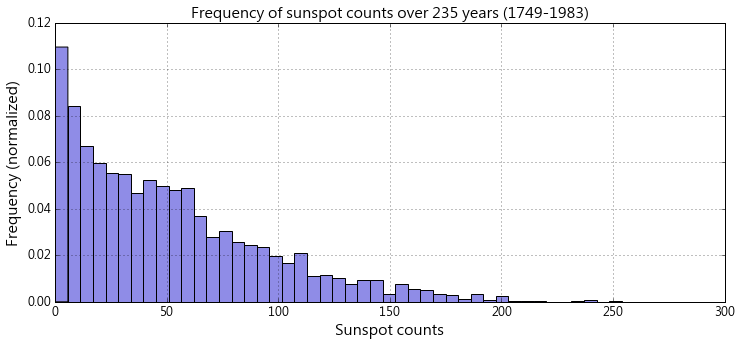

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))
#sns.distplot(num, label = 'Sunspots', bins = 50, ax = ax)
ax.hist(num, weights = weights, color = "#8f8ce7", bins = 45)
ax.set_xlabel("Sunspot counts", fontsize = 15)
ax.set_ylabel("Frequency (normalized)", fontsize = 15)
ax.set_title("Frequency of sunspot counts over 235 years (1749-1983)", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xlim(0, 300)
plt.grid()
plt.show()

- The probability density function (PDF) of gamma distribution:

$$f\left ( x \right )=\frac{1}{\beta^{\alpha }\Gamma \left(\alpha\right )}x^{\alpha-1}e^{-\frac{x}{\beta }};\ \alpha>0, \beta>0$$

$$\Rightarrow \text{ln}\ f\left ( x \right )=\left ( \alpha-1 \right )\text{ln}\ x -\frac{x}{\beta }-\alpha \text{ln}\ \beta -\text{ln}\ \Gamma \left(\alpha\right )$$

The **acceptance-rejection sampling** can be expressed as

(i) If $P\left ( D|\alpha_{new},\ \beta_{new} \right )P\left ( \alpha_{new},\ \beta_{new} \right )/\left ( P\left ( D|\alpha_{current},\ \beta_{current} \right )P\left ( \alpha_{current},\ \beta_{current} \right ) \right ) \geq 1$, we accept $\alpha_{new},\ \beta_{new}$.

$$\begin{equation} 
\begin{aligned}
\frac{\prod_{i=1}^{n}f\left ( d_{i}|\alpha_{new},\ \beta_{new} \right )P\left ( \alpha_{new},\ \beta_{new} \right )}{\prod_{i=1}^{n}f\left ( d_{i}|\alpha_{current},\ \beta_{current} \right )P\left ( \alpha_{current},\ \beta_{current} \right )} &\geq 1\\
\\
\Rightarrow \sum_{i=1}^{n}\left [ \left ( \alpha_{new}-1 \right )\text{ln}\ d_{i} -\frac{d_{i}}{\beta_{new}}-\alpha_{new} \text{ln}\ \beta_{new} -\text{ln}\ \Gamma \left(\alpha_{new}\right ) \right]+\text{ln}\left ( P\left ( \alpha_{new},\ \beta_{new} \right ) \right ) &\geq \sum_{i=1}^{n}\left [ \left ( \alpha_{current}-1 \right )\text{ln}\ d_{i} -\frac{d_{i}}{\beta_{current}}-\alpha_{current} \text{ln}\ \beta_{current} -\text{ln}\ \Gamma \left(\alpha_{current}\right ) \right ]+\text{ln}\left ( P\left ( \alpha_{current},\ \beta_{current} \right ) \right ) 	
\end{aligned} 	
\end{equation}$$

(ii) If $P\left ( D|\alpha_{new},\ \beta_{new} \right )P\left ( \alpha_{new},\ \beta_{new} \right )/\left ( P\left ( D|\alpha_{current},\ \beta_{current} \right )P\left ( \alpha_{current},\ \beta_{current} \right ) \right ) < 1$, we generate a random number $u\in [0, 1]$ from **an uniform distribution**.
  
   - $u \leq $  $P\left ( D|\alpha_{new},\ \beta_{new} \right )P\left ( \alpha_{new},\ \beta_{new} \right )/\left ( P\left ( D|\alpha_{current},\ \beta_{current} \right )P\left ( \alpha_{current},\ \beta_{current} \right ) \right )$ $\Rightarrow$ we accept $\alpha_{new},\ \beta_{new}$.
     
   - $u > $  $P\left ( D|\alpha_{new},\ \beta_{new} \right )P\left ( \alpha_{new},\ \beta_{new} \right )/\left ( P\left ( D|\alpha_{current},\ \beta_{current} \right )P\left ( \alpha_{current},\ \beta_{current} \right ) \right )$ $\Rightarrow$ we reject $\alpha_{new},\ \beta_{new}$.

In [5]:
# define the proposal distribution
proposal_distribution = lambda x: np.random.normal(x, [0.05, 2], size=(2,))

# define the likelihood function (log form)
def log_lik_gamma(x, data):
    return np.sum((x[0]-1)*np.log(data)-(1/x[1])*data-x[0]*np.log(x[1])-np.log(math.gamma(x[0])))

# define prior function
def prior(x):
    if(x[0]<=0 or x[1]<=0):
        return 0
    else:
        return 1

# Define whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new >= x:
        return True
    else:
        u = np.random.uniform(0, 1)
        return (u <= (np.exp(x_new - x)))

# Define M-H sampling
def metropolis_hastings(data, param_init, iterations, proposal_distribution, likelihood_function,
                        prior, acceptance_rule):
    x = param_init
    accepted = []
    rejected = []   
    
    for i in range(iterations):
        x_new =  proposal_distribution(x)    
        x_lik = likelihood_function(x, data)
        x_new_lik = likelihood_function(x_new, data) 
        
        if (acceptance(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        
        else:
            rejected.append(x_new)            

    return np.array(accepted), np.array(rejected)

In [6]:
accepted, rejected = metropolis_hastings(num, [6, 8], 50000, proposal_distribution, log_lik_gamma,
                                         prior, acceptance)

In [7]:
print(accepted[-10:])
print("accepted.shape = ", accepted.shape)
print("---------------------------------")
print(rejected[-10:])
print("rejected.shape = ", rejected.shape)

[[  1.00148499  53.89778304]
 [  0.99015184  52.47110594]
 [  0.97282067  51.79163325]
 [  0.96015369  52.44786443]
 [  0.9745697   53.31774588]
 [  0.96565569  53.33212297]
 [  0.95109309  53.23146766]
 [  0.97324979  53.69755462]
 [  0.99120496  54.11084981]
 [  0.98440288  53.70067462]]
accepted.shape =  (11980, 2)
---------------------------------
[[  0.94028271  56.26652642]
 [  1.03275336  56.67877266]
 [  1.03819114  54.44552553]
 [  1.08340944  54.57268593]
 [  0.9734523   48.53322431]
 [  1.06196377  56.95571193]
 [  0.97585764  55.02185609]
 [  1.10482401  54.56041187]
 [  1.01431753  53.95878189]
 [  1.01926248  55.08885028]]
rejected.shape =  (38020, 2)


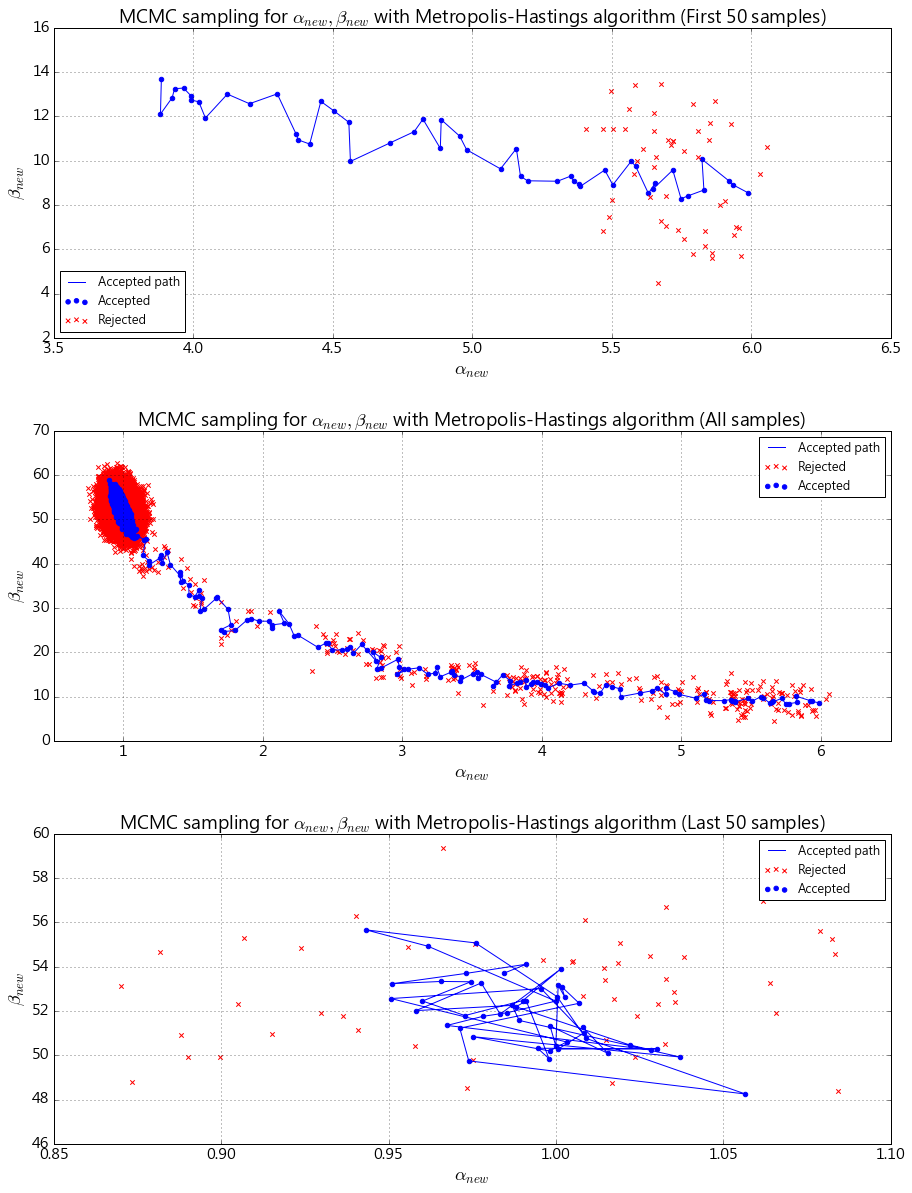

In [8]:
ig, ax = plt.subplots(3, 1, figsize = (15, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].plot(accepted[:50, 0], accepted[:50, 1], color = 'b', label = "Accepted path")
ax[0].scatter(accepted[:50, 0], accepted[:50, 1], color = 'b', label = "Accepted")
ax[0].scatter(rejected[:50, 0], rejected[:50, 1], color = 'r', marker = 'x', label = "Rejected")
ax[0].set_xlabel(r"$\alpha_{new}$", fontsize = 18)
ax[0].set_ylabel(r"$\beta_{new}$", fontsize = 18)
ax[0].set_title(r"MCMC sampling for $\alpha_{new}, \beta_{new}$ with Metropolis-Hastings algorithm (First 50 samples)", fontsize = 18)
ax[0].set_xlim(3.5, 6.5)
ax[0].legend(loc = 'lower left', fontsize = 12)
ax[0].grid()
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].plot(accepted[:, 0], accepted[:, 1], color = 'b', label = "Accepted path")
ax[1].scatter(rejected[:, 0], rejected[:, 1], color = 'r', marker = 'x', label = "Rejected")
ax[1].scatter(accepted[:, 0], accepted[:, 1], color = 'b', label = "Accepted")
ax[1].set_xlabel(r"$ \alpha_{new}$", fontsize = 18)
ax[1].set_ylabel(r"$\beta_{new}$", fontsize = 18)
ax[1].set_title(r"MCMC sampling for $\alpha_{new}, \beta_{new}$ with Metropolis-Hastings algorithm (All samples)", fontsize = 18)
ax[1].set_xlim(0.5, 6.5)
ax[1].legend(loc = 'upper right', fontsize = 12)
ax[1].grid()
ax[2].tick_params(axis = 'both', labelsize = 15)
ax[2].plot(accepted[-50:, 0], accepted[-50:, 1], color = 'b', label = "Accepted path")
ax[2].scatter(rejected[-50:, 0], rejected[-50:, 1], color = 'r', marker = 'x', label = "Rejected")
ax[2].scatter(accepted[-50:, 0], accepted[-50:, 1], color = 'b', label = "Accepted")
ax[2].set_xlabel(r"$ \alpha_{new}$", fontsize = 18)
ax[2].set_ylabel(r"$\beta_{new}$", fontsize = 18)
ax[2].set_title(r"MCMC sampling for $\alpha_{new}, \beta_{new}$ with Metropolis-Hastings algorithm (Last 50 samples)", fontsize = 18)
ax[2].set_xlim(0.85, 1.1)
ax[2].legend(loc = 'upper right', fontsize = 12)
ax[2].grid()
plt.show()

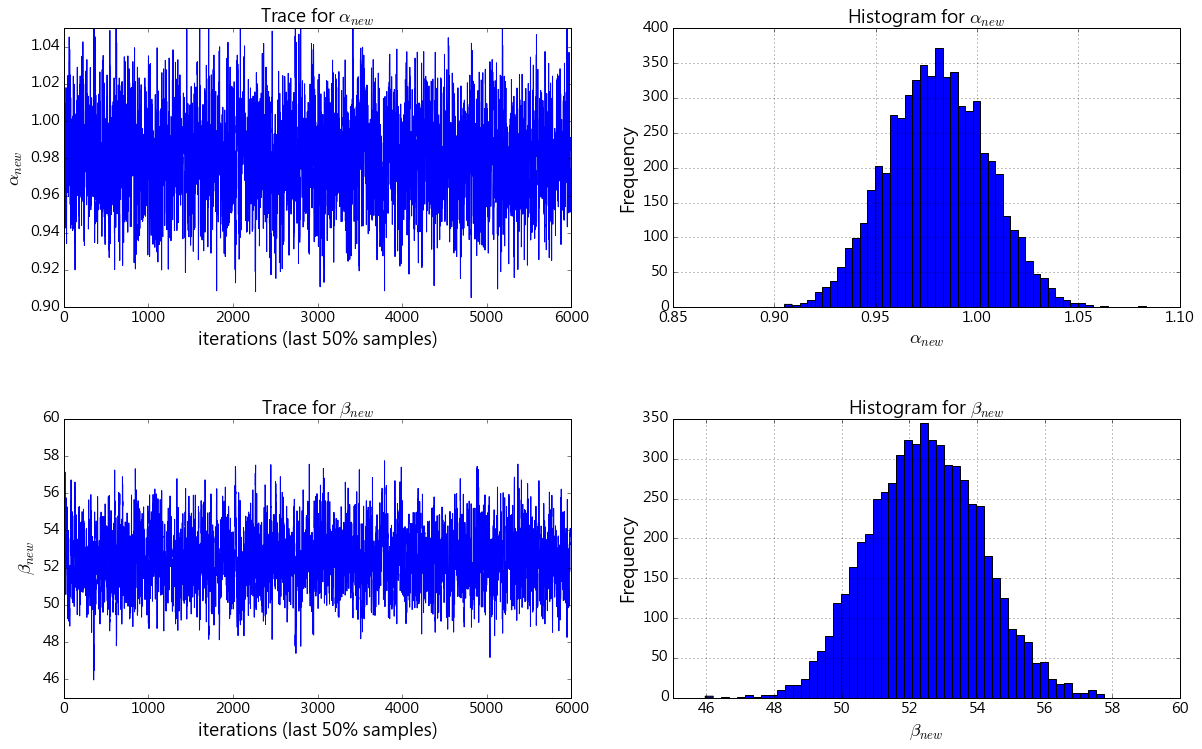

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
plt.subplots_adjust(hspace = 0.4)
ax[0, 0].tick_params(axis = 'both', labelsize = 15)
ax[0, 0].plot(accepted[int(accepted[:, 0].size/2):, 0], color = 'b')
ax[0, 0].set_xlabel("iterations (last 50% samples)", fontsize = 18)
ax[0, 0].set_ylabel(r"$\alpha_{new}$", fontsize = 18)
ax[0, 0].set_title(r"Trace for $\alpha_{new}$", fontsize = 18)
ax[0, 0].set_ylim(0.9, 1.05)
ax[0, 1].tick_params(axis = 'both', labelsize = 15)
ax[0, 1].hist(accepted[int(accepted[:, 0].size/2):, 0], bins = 50)
ax[0, 1].set_xlabel(r"$\alpha_{new}$", fontsize = 18)
ax[0, 1].set_ylabel("Frequency", fontsize = 18)
ax[0, 1].set_title(r"Histogram for $\alpha_{new}$", fontsize = 18)
ax[0, 1].set_xlim(0.85, 1.1)
ax[0, 1].grid()
ax[1, 0].tick_params(axis = 'both', labelsize = 15)
ax[1, 0].plot(accepted[int(accepted[:, 0].size/2):, 1], color = 'b')
ax[1, 0].set_xlabel("iterations (last 50% samples)", fontsize = 18)
ax[1, 0].set_ylabel(r"$\beta_{new}$", fontsize = 18)
ax[1, 0].set_title(r"Trace for $\beta_{new}$", fontsize = 18)
ax[1, 0].set_ylim(45, 60)
ax[1, 1].tick_params(axis = 'both', labelsize = 15)
ax[1, 1].hist(accepted[int(accepted[:, 0].size/2):, 1], bins = 50)
ax[1, 1].set_xlabel(r"$\beta_{new}$", fontsize = 18)
ax[1, 1].set_ylabel("Frequency", fontsize = 18)
ax[1, 1].set_title(r"Histogram for $\beta_{new}$", fontsize = 18)
ax[1, 1].set_xlim(45, 60)
ax[1, 1].grid()
plt.show()

In [10]:
Z = accepted[int(accepted[:, 0].size/2):, :]
Z

array([[  0.95891455,  54.62861358],
       [  0.95031093,  54.36312575],
       [  0.96318095,  52.87138933],
       ..., 
       [  0.97324979,  53.69755462],
       [  0.99120496,  54.11084981],
       [  0.98440288,  53.70067462]])

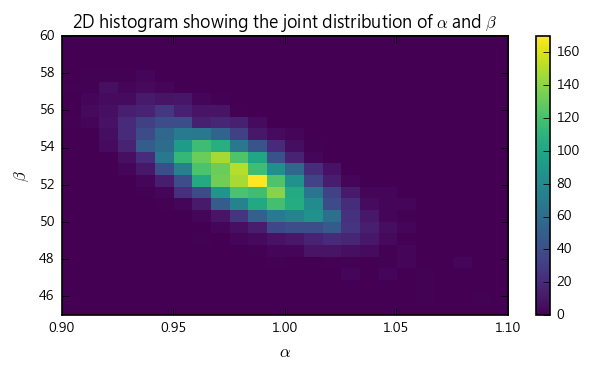

In [11]:
fig = plt.figure(figsize = (6, 3), dpi = 120)
ax = fig.add_subplot(1,1,1)
xbins, ybins = np.linspace(0.9, 1.1, 25), np.linspace(45, 60, 25)

counts, xedges, yedges, im = ax.hist2d(accepted[int(accepted[:, 0].size/2):, 0],
                                       accepted[int(accepted[:, 0].size/2):, 1],
                                       bins=[xbins, ybins], cmap = "viridis")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
ax.set_title(r"2D histogram showing the joint distribution of $\alpha$ and $\beta$", fontsize = 10)
plt.tick_params(labelsize = 8)
cb = plt.colorbar(im, ax = ax)
cb.ax.tick_params(labelsize = 8)
plt.show()

- Unicode characters for engineers in Python: https://pythonforundergradengineers.com/unicode-characters-in-python.html

In [12]:
print("Mean \u03B1 = ", np.mean(accepted[int(accepted[:, 0].size/2):, 0]))
print("Mean \u03B2 = ", np.mean(accepted[int(accepted[:, 0].size/2):, 1]))

Mean α =  0.980476881661
Mean β =  52.4650106062


In [13]:
mean_alpha = np.mean(accepted[int(accepted[:, 0].size/2):, 0])
mean_beta = np.mean(accepted[int(accepted[:, 0].size/2):, 1])

predicted_model = lambda t, mean_alpha, mean_beta:np.random.gamma(mean_alpha, mean_beta, t)
t = np.arange(num.shape[0])
predicted_obs = predicted_model(t.shape[0], mean_alpha, mean_beta)
predicted_weights = np.ones_like(np.array(predicted_obs))/float(len(np.array(predicted_obs)))

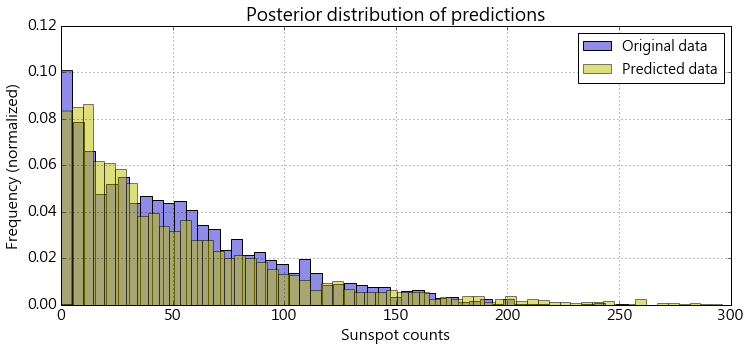

In [14]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.tick_params(axis = 'both', labelsize = 15)
ax.hist(num, weights = weights, color = "#8f8ce7", bins = 50, label = "Original data")
ax.hist(predicted_obs, weights = predicted_weights, color = 'y', bins = 85, label = "Predicted data", alpha = 0.5)
ax.set_xlabel("Sunspot counts", fontsize = 15)
ax.set_ylabel("Frequency (normalized)", fontsize = 15)
ax.set_title("Posterior distribution of predictions", fontsize = 18)
ax.set_xlim(0, 300)
ax.legend(loc = 'upper right', fontsize = 14)
ax.grid()
plt.show()

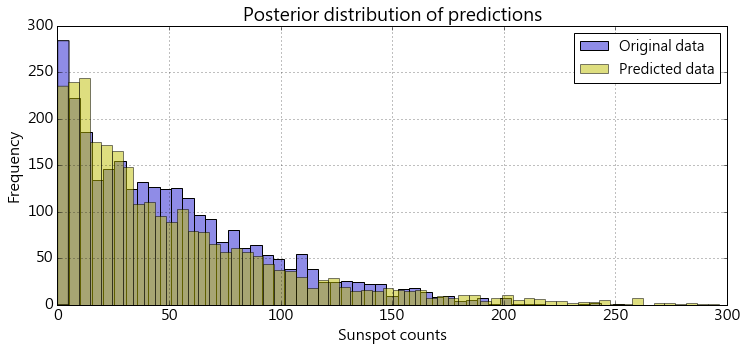

In [15]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.tick_params(axis = 'both', labelsize = 15)
ax.hist(num, color = "#8f8ce7", bins = 50, label = "Original data")
ax.hist(predicted_obs, color = 'y', bins = 85, label = "Predicted data", alpha = 0.5)
ax.set_xlabel("Sunspot counts", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)
ax.set_title("Posterior distribution of predictions", fontsize = 18)
ax.set_xlim(0, 300)
ax.legend(loc = 'upper right', fontsize = 14)
ax.grid()
plt.show()

**Reference:**

- [From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings in Python](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a)